[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



- a: Color
- b: Age
- c: Number of students in stat 220
- d: Someone's height

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

In [3]:
carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


Part a. Construct a histogram of CO2 emissions.

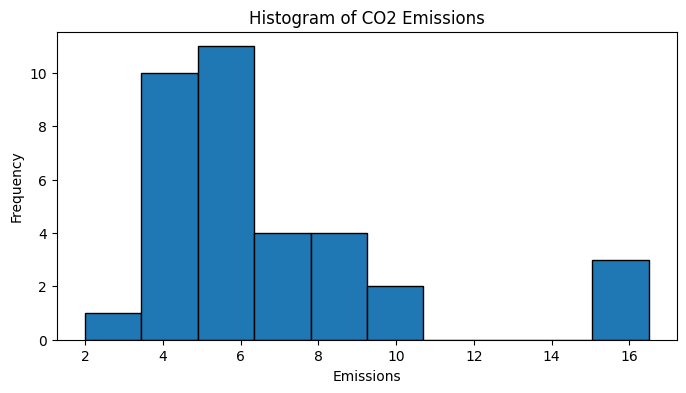

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("Emissions")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [5]:
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [6]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [7]:
murders.head()

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


In [8]:
murders_no_dc = murders[murders["state"] != "DC"]

Part a. Find the mean and standard deviation for murders without D.C.

In [9]:
mean_no_dc = np.mean(murders_no_dc["murder"])
std_no_dc = np.std(murders_no_dc["murder"])

print(f"Mean: {mean_no_dc}")
print(f"Standard Deviation: {std_no_dc}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [10]:
minimum = np.min(murders_no_dc["murder"])
q1 = np.percentile(murders_no_dc["murder"], 25)
median = np.median(murders_no_dc["murder"])
mean = np.mean(murders_no_dc["murder"])
q3 = np.percentile(murders_no_dc["murder"], 75)
maximum = np.max(murders_no_dc["murder"])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")
print(f"Mean:{mean}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4
Mean:4.874


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

- The mean is affected more (went from 4.87 to 5.25)
- The outer/entier range is affected more (max went from 12.4 to 24.2)

In [11]:
minimum = np.min(murders["murder"])
q1 = np.percentile(murders["murder"], 25)
median = np.median(murders["murder"])
mean = np.mean(murders["murder"])
q3 = np.percentile(murders["murder"], 75)
maximum = np.max(murders["murder"])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")
print(f"Mean:{mean}")

Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2
Mean:5.252941176470588


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [12]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [13]:
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


In [14]:
x = houses['size']
y = houses['price']

Part a. Construct a scatterplot between square feet and price of a home.

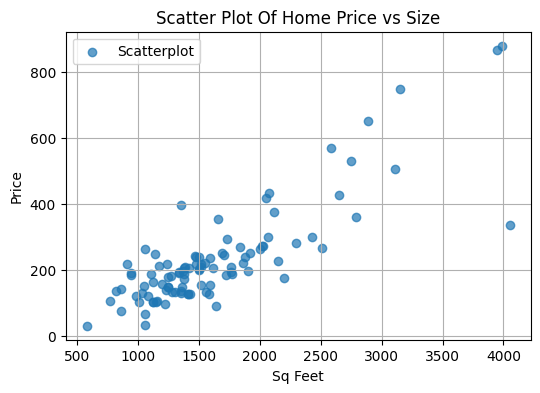

In [15]:
# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

plt.title('Scatter Plot Of Home Price vs Size')
plt.xlabel('Sq Feet')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part b. Find the correlation between the two variables.

In [16]:
correlation = y.corr(x)

print(f'Correlation between home price and size: {correlation}')

Correlation between home price and size: 0.8337847885586538


Part c. Find and plot the regression line on top of the scatterplot.

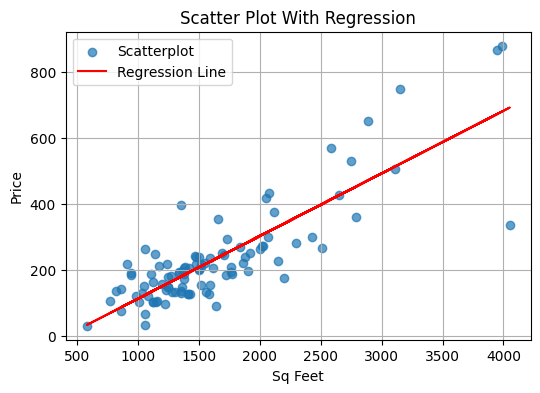

In [17]:
# Create a LinearRegression model
x_flat = houses[['size']]
model = LinearRegression()

# Fit the model to the data
model.fit(x_flat, y)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')
# Plot the regression line
plt.plot(x_flat, model.predict(x_flat), color='red', label='Regression Line')
plt.title('Scatter Plot With Regression')
plt.xlabel('Sq Feet')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

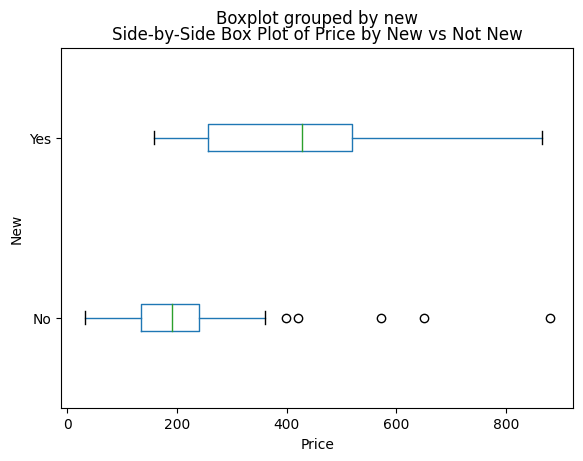

In [18]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Price by New vs Not New')
plt.xlabel('Price')
plt.ylabel('New')
plt.yticks([1, 2], ['No', 'Yes'])
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

- As can be seen from the scatter plot and the correlation value, there is a strong positive relationship between how big a house is and its price (bigger houses tend to be more expensive).
- Based on the box plot, it is clear that new houses have a higher price than old ones although there are some significant outlies on old houses that cost as much or more than the average new house.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [19]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')

In [20]:
happy.head()

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [21]:
# Contingency table with raw counts
pd.crosstab(happy['happiness'], happy['marital'])

marital,1,2,3
happiness,,,
1,432,92,124
2,504,282,409
3,61,103,135


In [22]:
# Contingency table with proportions
pd.crosstab(happy['happiness'], happy['marital'], normalize = "index")

marital,1,2,3
happiness,,,
1,0.666667,0.141975,0.191358
2,0.421757,0.235983,0.342259
3,0.204013,0.344482,0.451505
